# Assistants v2 Experiments

## Initiate API Key

In [1]:
from openai import OpenAI
import os

%load_ext dotenv
#%reload_ext dotenv
%dotenv

client = OpenAI(
    api_key=os.environ.get("API_TOKEN"),
)

## Upload an initial file to work with

In [3]:
file = client.files.create(
  file=open("Selenography.csv", "rb"),
  purpose='assistants'
)

## Create new Assistant and enable file search

In [4]:
assistant = client.beta.assistants.create(
  name="Lunar Explorer",
  description="You are a lunar scientist that specializes in lunar geology, cartography, and data science. You analyze data present in .csv files, understand trends, and come up with data visualizations relevant about the Moon. You also expert knowledge to users about lunar geology.",
  model="gpt-4o",
  tools=[{"type": "code_interpreter"}],
  tool_resources={
    "code_interpreter": {
      "file_ids": [file.id]
    }
  }
)

### Basic test of assistant functionality

In [8]:
import time

assistant = client.beta.assistants.retrieve("asst_PtGBc4KCqz111uFMGClHu1hf")

thread = client.beta.threads.create()


message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="List all of the types of lunar features in your database",
    #file_ids=[file.id]
)

run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
)

status = None
while status != "completed":
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )
    status = run.status
    if status != "completed":
        time.sleep(2)



messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

assistant_response = messages.data[0].content[0].text.value
print(assistant_response)

The lunar database contains the following types of lunar features:

1. Albedo Feature
2. Catena, catenae (chains of craters)
3. Crater, craters
4. Dorsum, dorsa (ridges)
5. Fossa, fossae (ditches)
6. Lacus, lacūs (lakes)
7. Landing site name
8. Mare, maria (seas)
9. Mons, montes (mountains)
10. Oceanus, oceani (oceans)
11. Palus, paludes (marshes)
12. Planitia, planitiae (plains)
13. Promontorium, promontoria (capes or headlands)
14. Rima, rimae (rilles)
15. Rupes, rupēs (cliffs or escarpments)
16. Satellite Feature
17. Sinus, sinūs (bays)
18. Vallis, valles (valleys)

Is there anything specific you would like to do with this information?


## Create some data visualizations from the CSV

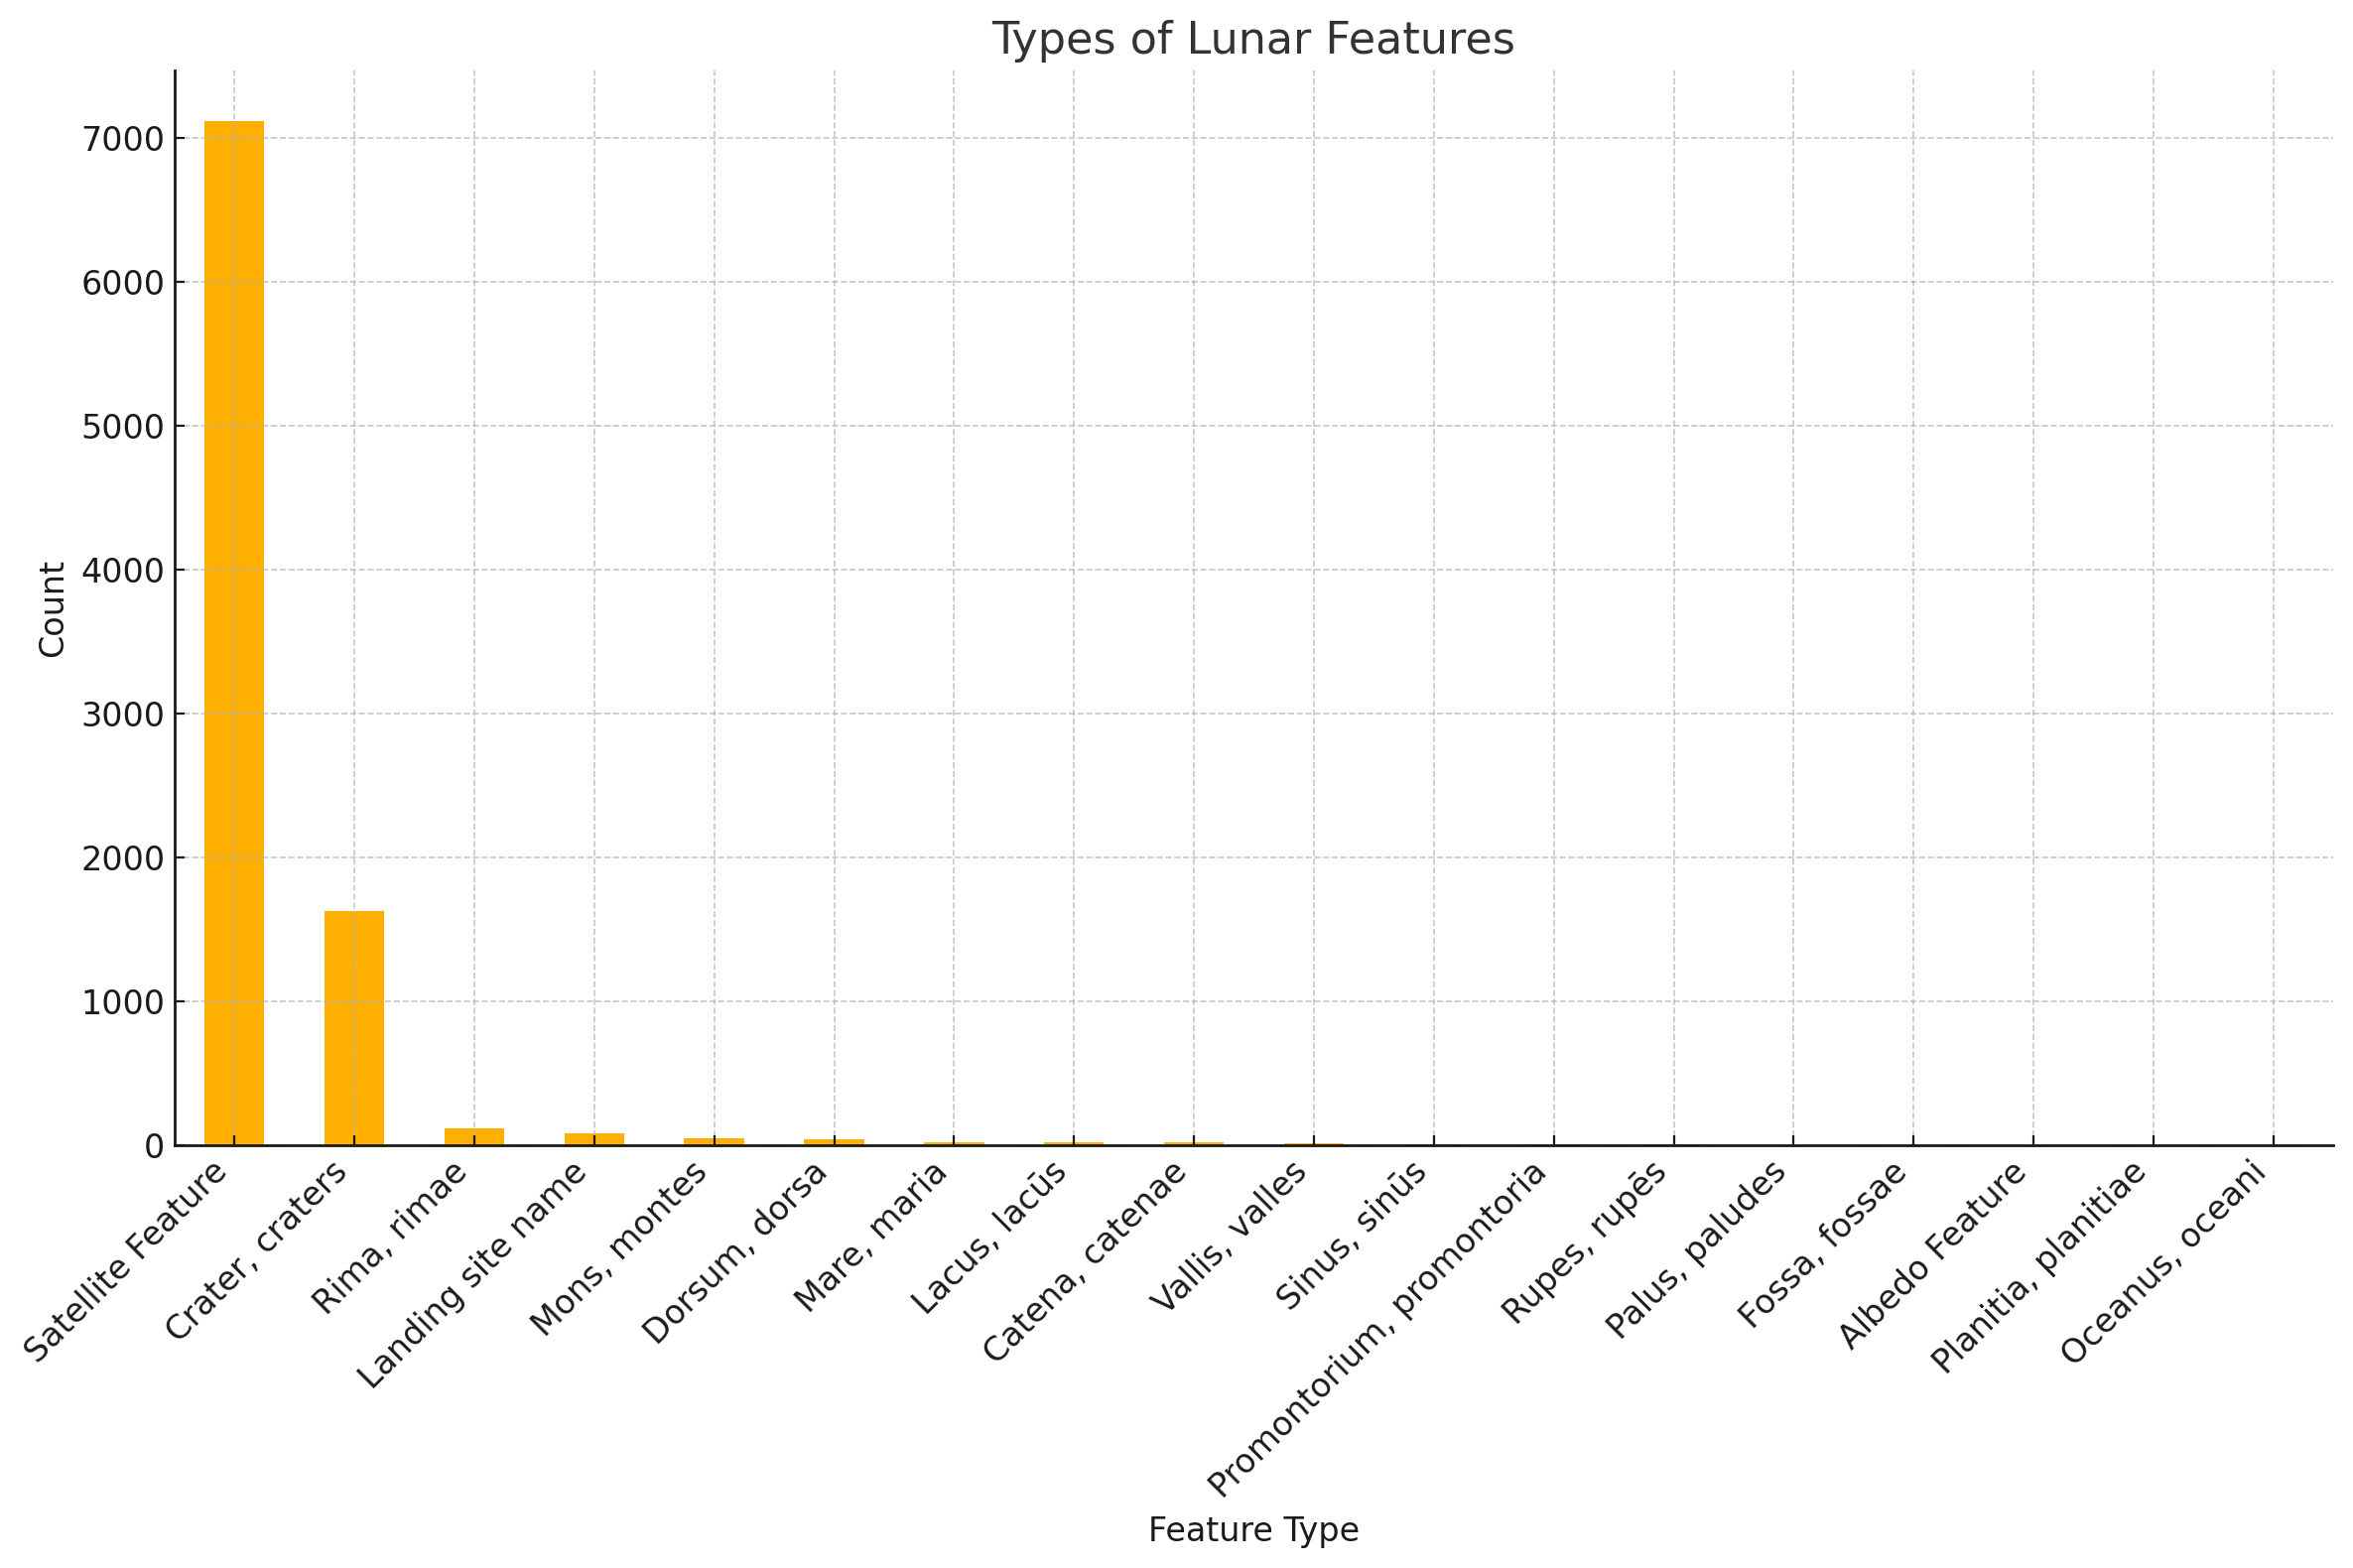

In [4]:
import time
from PIL import Image
from IPython.display import display

assistant = client.beta.assistants.retrieve("asst_PtGBc4KCqz111uFMGClHu1hf")

thread = client.beta.threads.create()


message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="create a bar chart of all of the types of lunar features in your database and display the result",
    #file_ids=[file.id]
)

run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
)

status = None
while status != "completed":
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )
    status = run.status
    if status != "completed":
        time.sleep(2)

messages = client.beta.threads.messages.list(
    thread_id=thread.id
)  
assistant_response = messages.data[0].content[0].image_file.file_id

image_data = client.files.content("file-gxRzMF1mc9WeB0euJbfFmQvd")
display(Image.open(image_data))

#client.files.delete(assistant_response)


## Enterprise Architect Assistants API experiment

In [3]:
import time

assistant = client.beta.assistants.retrieve("asst_YG1kOyOuM4IpeX46KEvY4LN9")

thread = client.beta.threads.create()


message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="I am developing an API. What standards and best practices do I need to be aware of? Also, what do I need to know about using an API gateway?",
    #file_ids=[file.id]
)

run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
)

status = None
while status != "completed":
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )
    status = run.status
    if status != "completed":
        time.sleep(2)



messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

assistant_response = messages.data[0].content[0].text.value
print(assistant_response)

When developing an API, there are several standards and best practices you should be aware of. These generally include:

1. **API Architecture and Design Principles**: This involves considering the characteristics your APIs should have to ensure they meet your organizational needs and comply with relevant standards. For example, APIs might need to follow certain documentation standards, especially if they are intended to be used by multiple groups within your organization 【0†api_gateway_portal_standards0_4 copy.pdf】.

2. **API Platform Components**: Notably, this includes using an API Portal and an API Gateway. An API portal should support developer onboarding by providing a central source for documentation and making APIs discoverable. An API gateway acts as a single point of entry for APIs. It abstracts complexity and centralizes aspects such as authentication, monitoring, and rate-limiting policies 【9†api_gateway_portal_standards0_4 copy.pdf】.

3. **Categorizing APIs**: Different AP

## Horizon Report Assistant

In [3]:
import time

assistant = client.beta.assistants.retrieve("asst_0CgJGj7kxmYasL9Tb5yCJq8V")

thread = client.beta.threads.create()


message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="what key developments in data management do I need to be aware of at Harvard?",
    #file_ids=[file.id]
)

run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
)

status = None
while status != "completed":
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )
    status = run.status
    if status != "completed":
        time.sleep(2)



messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

assistant_response = messages.data[0].content[0].text.value
print(assistant_response)

To be aware of key developments in data emerging at Harvard, you should focus on several strategic initiatives and modern technology investments. Here are some of the key areas and recent projects:

1. **Data Governance Framework**: Establishing a more formal university-wide Data Governance framework in collaboration with the Associate Provost for Institutional Research and University Research Data Officer【3:3†Data Management_FINAL_FINAL.pdf】.

2. **Modern Data Integration Skills**: Harvard should explore and invest in modern data technologies such as cloud-based data lake houses and fabrics, low-code integration tools, AI/ML toolkits, and Master Data Management to accelerate data onboarding, simplify distribution, and improve access【1:4†Data Management_FINAL_FINAL.pdf】.

3. **Data Quality and Integrity**: A significant emphasis on data quality and integrity is considered a crucial requirement for the success of any data initiative at Harvard【4:4†Data Management_FINAL_FINAL.pdf】.

4. *

## Assistants File Upload

In [5]:

client.files.create(
  file=open("Data Management_FINAL_FINAL.pdf", "rb"),
  purpose="assistants"
)


FileObject(id='file-g4K9hgifzwMFo2LVeJwymJc5', bytes=486441, created_at=1703364532, filename='Data Management_FINAL_FINAL.pdf', object='file', purpose='assistants', status='processed', status_details=None)

## Retrieve Information about a File

In [14]:
client.files.retrieve("file-CKoi6gfAyoLyH8OLCgogbebD")

FileObject(id='file-CKoi6gfAyoLyH8OLCgogbebD', bytes=160097, created_at=1702503700, filename='requirementsforoperationalmonitoring.pdf', object='file', purpose='assistants', status='processed', status_details=None)

## Retrieve the File Itself (note: Harvard's tenant doesn't allow file download)

In [ ]:
content = client.files.content("file-CKoi6gfAyoLyH8OLCgogbebD")

## List Assistants

In [2]:

my_assistants = client.beta.assistants.list(
    order="desc",
    limit="20",
)
print(my_assistants.data)


[Assistant(id='asst_aZneJjsMYslG6o86GNbv2TPU', created_at=1717097303, description=None, instructions='You are a personal math tutor. When asked a question, write and run Python code to answer the question.', metadata={}, model='gpt-4-turbo', name='Math Tutor', object='assistant', tools=[CodeInterpreterTool(type='code_interpreter')], response_format='auto', temperature=1.0, tool_resources=ToolResources(code_interpreter=ToolResourcesCodeInterpreter(file_ids=[]), file_search=None), top_p=1.0), Assistant(id='asst_TmTilb5e9T3jvJWWl7NO0g3h', created_at=1717089893, description=None, instructions='You are a personal math tutor. When asked a question, write and run Python code to answer the question.', metadata={}, model='gpt-4-turbo', name='Math Tutor', object='assistant', tools=[CodeInterpreterTool(type='code_interpreter')], response_format='auto', temperature=1.0, tool_resources=ToolResources(code_interpreter=ToolResourcesCodeInterpreter(file_ids=[]), file_search=None), top_p=1.0), Assistant

## List Assistant Files

In [19]:

assistant_files = client.beta.assistants.files.list(
  purpose="assistants"
)
print(assistant_files)


AttributeError: 'Assistants' object has no attribute 'files'

## Add files to assistant

In [7]:

my_updated_assistant = client.beta.assistants.update(
  "asst_0CgJGj7kxmYasL9Tb5yCJq8V",
  instructions="You are a senior tech leader providing IT horizon reports for Harvard's IT community. Always response with info from your provided files",
  name="Horizon Report",
  tools=[{"type": "retrieval"}],
  model="gpt-4-1106-preview",
  file_ids=["file-g4K9hgifzwMFo2LVeJwymJc5", "file-qO65eBcxTpzsjrxUkxsRhiaN","file-CCnT4UrHagvYLHesx5l4efUw", "file-2xppKFhfrN1POon0J3O0fr3n","file-LFcW8od8QPsmEuyT2vJqLqvO","file-idHYgMaTxoa0gQAAYBeGZhO5","file-xMilmZ8XuVrpz5p87Id4cfc3","file-zZRBfzwLvMHHvLGNNTvttZPf"],
)

print(my_updated_assistant)


Assistant(id='asst_0CgJGj7kxmYasL9Tb5yCJq8V', created_at=1702586565, description=None, file_ids=['file-g4K9hgifzwMFo2LVeJwymJc5', 'file-qO65eBcxTpzsjrxUkxsRhiaN', 'file-CCnT4UrHagvYLHesx5l4efUw', 'file-2xppKFhfrN1POon0J3O0fr3n', 'file-LFcW8od8QPsmEuyT2vJqLqvO', 'file-idHYgMaTxoa0gQAAYBeGZhO5', 'file-xMilmZ8XuVrpz5p87Id4cfc3', 'file-zZRBfzwLvMHHvLGNNTvttZPf'], instructions="You are a senior tech leader providing IT horizon reports for Harvard's IT community. Always response with info from your provided files", metadata={}, model='gpt-4-1106-preview', name='Horizon Report', object='assistant', tools=[ToolRetrieval(type='retrieval')])
